In [1]:
# Ne pas oublier d'exécuter cette ligne au début de chaque séance pour charger les bibliothèques nécessaires
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H1>L1 CUPGE - Python TP3</H1>

# 1 Manipulation de polynômes en Python

On souhaite effectuer des calculs avec des polynômes. Python ne dispose pas a priori de type qui permette tel quel de manipuler des polynômes. Il nous faut donc définir une convention pour adapter les types existants à nos besoins.

On considère le polynôme

$$P(X)=\sum_{k=0}^na_kX^k=a_0+a_1X+\ldots+a_nX^n$$

où les $(a_k)_{0\leq k\leq n}$ sont des réels. Nous allons représenter ce polynôme en Python par la liste de ses coefficients $a_k$, en commençant par le coefficient de plus bas degré. C'est à dire que la représentation de $P$ sera la liste suivante:

```
[a0, a1, ... , an]
```

En utilisant cette convention, créer les listes `P`, `Q` et `R` représentant les polynômes suivants:

$$P(X)=2X-3\qquad Q(X)=1-X+2X^2\qquad R(X)=1+X^3.$$

In [2]:
P=[-3,2]
Q=[1,-1,2]
R=[1,0,0,1]

Créer une fonction `evaluepoly(P, x)` qui, à partir de la représentation du polynôme $P$, renvoie la valeur de $P(x)$. La tester avec les polynômes $P$, $Q$ et $R$ définis précédemment sur des exemples, et vérifier qu'on obtient le résultat attendu.

In [3]:
def evaluepoly(P, x):
    S=0
    for k in range (len(P)):
        S=S+P[k]*x**(k)
    return S

print(evaluepoly(Q,2))

7


Créer une fonction `affichepoly(P, xmin, xmax)` qui affiche la représentation graphique du polynôme `P` sur l'intervalle $[x_{\min},x_{\max}]$. On découpera cet intervalle en 1000 sous-intervalles.

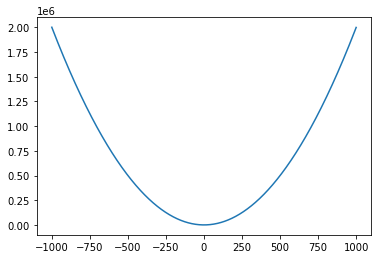

In [4]:
def affichepoly(P, xmin, xmax):
    l1=[]
    l2=[]
    for k in range (1001):
        x=xmin+k*(xmax-xmin)/1000
        l1.append(x)
        y=evaluepoly(P,x)
        l2.append(y)
    plot(l1,l2)

affichepoly(Q, -1000,1000 )
    

# 2 Comment implémenter la fonction sinus avec des multiplications et des additions?

Dessiner un cercle grâce à l'équation paramétrique suivante:

$$\begin{cases}x(t)=\cos t\cr y(t)=\sin t\end{cases}\qquad t\in[0,2\pi].$$

On subdivisera l'intervalle $[0,2\pi]$ en 1000 sous-intervalles.

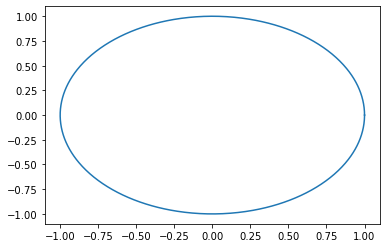

In [5]:
l1=[]
l2=[]
for k in range(1001):
    t=k*(2*pi)/1000
    x=cos(t)
    l1.append(x)
    y=sin(t)
    l2.append(y)

plot(l1,l2)

Supposez un instant que vous êtes dans la situation suivante.

Le logiciel Python a été mal installé sur votre machine et il vous manque les bibliothèques de fonctions mathématiques. Vous n'avez accès à aucune fonction spéciale (cos, sin, exp, log, etc...) ni aux nombres complexe et vous pouvez seulement effectuer des additions, soustractions,  multiplications et divisions. Or vous souhaitez dessiner un cercle et vous avez besoin des fonctions $\sin$ et $\cos$...

Au XVIIIème siècle, le mathématicien anglais Brook Taylor s'intéresse à un problème similaire: comment approximer une fonction par un polynôme? Il montre que sous condition de régularité, on peut construire un polynôme qui approxime la fonction au voisinage d'un point donné: c'est la formule qui porte son nom.

Pour exploiter cette formule, nous allons avoir besoin d'implémenter la factorielle. On rappelle que:

$$n!=\prod_{1\leq k\leq n}k=1\times 2\times 3\times\ldots\times(n-1)\times n.$$

Définir une fonction `factorielle(n)` qui renvoie $n!$.

In [6]:
def factorielle(n):
    p=1
    for k in range (1,n+1):
        p=p*k
    return p

print(factorielle(0))

1


Calculer (**sur papier**) la suite des dérivées successives de la fonction $\sin$ en zéro, c'est à dire:

$$\sin(0), \sin'(0), \sin''(0), \sin'''(0), \sin^{(4)}(0), \sin^{(5)}(0), \sin^{(6)}(0), \sin^{(7)}(0), \ldots$$

et vérifier qu'elles sont égales à

$$0, 1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1, 0, 1, 0, -1\ldots$$

Définir une fonction `derivesin(n)` qui renvoie $\sin^{(n)}(0)$.

In [7]:
def derivesin(n):
    if n%2==0:
        return 0
    elif n%4==1:
        return 1
    else:
        return -1



La formule de Taylor nous dit que $\sin x$, au voisinage de zéro, peut être approché par le polynôme suivant:

$$\sum_{k=0}^n\frac{\sin^{(k)}(0)}{k!}X^k=\frac{\sin(0)}{0!}+\frac{\sin'(0)}{1!}X+\frac{\sin''(0)}{2!}X^2+\ldots+\frac{\sin^{(n)}(0)}{n!}X^n.$$

Définir une fonction `taylorsin(n)` qui renvoie la liste des coefficients de ce polynôme (attention aux divisions entre entiers!).

In [8]:
def taylorsin(n):
    l1=[]
    for k in range(n+1):
        l1.append(derivesin(k)/factorielle(k))
    return l1

print(taylorsin(6))

[0.0, 1.0, 0.0, -0.16666666666666666, 0.0, 0.008333333333333333, 0.0]


Créer une fonction `affichesin(xmin, xmax)` qui affiche la représentation graphique de la fonction `sin` sur l'intervalle $[x_{\min},x_{\max}]$. On découpera cet intervalle en 1000 sous-intervalles.

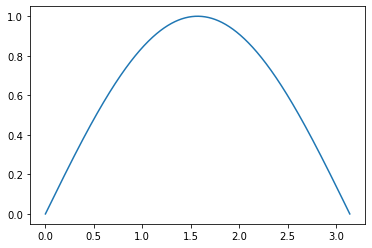

In [9]:
def affichesin(xmin, xmax):
    l1=[]
    l2=[]
    for k in range (1001):
        x=xmin+k*(xmax-xmin)/1000
        l1.append(x)
        y=sin(x)
        l2.append(y)
    plot(l1,l2)

affichesin(0,pi )

À l'aide des fonctions `affichepoly`, `taylorsin` et `affichesin`, représenter sur la même figure et dans l'intervalle $[-2\pi,2\pi]$:

+   le graphe de la fonction $\sin$
+   le graphe des polynômes de Taylor de $\sin$ pour $n=1,3,5,7,9,11$.

On ajustera les bornes de la fenêtre d'affichage grâce à cette instruction:

    axis([-2 * pi, 2 * pi, -2, 2])

Que constatez-vous?

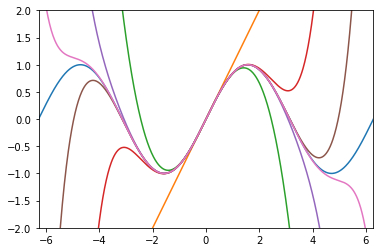

In [10]:
axis([-2 * pi, 2 * pi, -2, 2])
affichesin(-2*pi,2*pi )
l=[1,3,5,7,9,11]
for e in l:
    affichepoly(taylorsin(e), -2*pi, 2*pi)

Comme on a pu le voir sur le dessin, à condition de prendre **$n$ suffisamment grand** et de prendre **$x$ proche de zéro**, on est maintenant capable d'approximer $\sin x$ par des multiplications et des additions!

Dans ce qui suit, on va prendre $n=35$ et pour garantir que $x$ reste proche de zéro, on va mettre à profit les propriétés de périodicité de la fonction $\sin$.

Définir une fonction `approxsin(x)` qui renvoie le polynôme de Taylor de degré 35 évalué en "*`x` modulo $2\pi$*" (c'est à dire en `x % (2 * pi)`).

In [11]:
def approxsin(x):
    return evaluepoly(taylorsin(35), x%(2*pi))
print(approxsin(pi/2))

1.0000000000000002


On veut mesurer le maximum d'écart entre notre fonction `approxsin` et la fonction `sin` fournie par Python. Pour cela, en subdivisant l'intervalle $[-4\pi,4\pi]$ en 1000 sous-intervalles, créer la liste des valeurs de

$$\big\vert\operatorname{approxsin}(x_k)-\sin(x_k)\big\vert$$

et afficher son maximum grâce à la fonction `max` de Python.

Qu'en concluez-vous?

In [12]:
l1=[]
for k in range(1001):
    xk=-4*pi+k*8*pi/1000
    l1.append(abs(approxsin(xk)-sin(xk)))

print(max(l1))
    

3.636327350342583e-14


À l'aide de l'identité

$$\cos x=\sin\big(x+\frac\pi2\big),$$

définir une fonction `approxcos` (en utilisant `approxsin`).

In [13]:
def approxcos(x):
    return approxsin(x+pi/2)

Représenter, sur le même dessin et sur l'intervalle $[-2\pi,2\pi]$, les fonctions `approxsin` et `approxcos`.

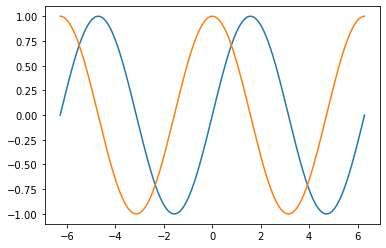

In [14]:
l=[]
l1=[]
l2=[]
for k in range (1001):
    xk=-2*pi+k*4*pi/1000
    l.append(xk)
    l1.append(approxsin(xk))
    l2.append(approxcos(xk))
plot(l,l1)
plot(l,l2)

Revenons au problème initial: sans utiliser les fonctions $\sin$ et $\cos$, en effectuant seulement des additions et des multiplications, redessiner le cercle paramétré du début de cette partie.

(-1.0999999999999999,
 1.1000000000000003,
 -1.0999999999999999,
 1.1000000000000003)

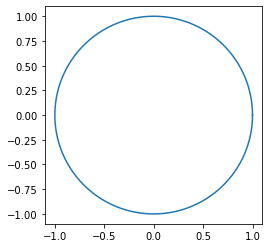

In [15]:
l1=[]
l2=[]
for k in range(1001):
    t=k*(2*pi)/1000
    x=approxcos(t)
    l1.append(x)
    y=approxsin(t)
    l2.append(y)

plot(l1,l2)
axis("scaled")

# 3 Problème d'artilleur

On souhaite évaluer la portée d'un tir de mortier. Pour cela, on dispose des données suivantes:

+   le projectile pèse 1Kg;
+   le canon est incliné de 45°;
+   la vitesse initiale du projectile au départ est de 100 m/sec.

Pour modéliser le problème, on suppose que la position du projectile est repérée à tout instant $t$ par un nombre complexe $f(t)$ dont:

+   la partie réelle représente la distance horizontale parcourue en mètres,
+   la partie imaginaire représente la hauteur (altitude) en mètres par rapport au point de départ.

On aura donc $f(0)=0$ (position initiale) et $f'(0)=100\times e^{i\pi/4}$ (vitesse initiale).

L'application de la deuxième loi de Newton permet d'écrire que $f$ vérifie l'équation:

$$f''(t)=-Gi-Kf'(t).\tag{*}$$

Le premier terme représente l'effet de la force de gravitation, le second la résistance de l'air (proportionnelle à la vitesse $f'$ et de sens opposé). On prendra $G=10$ et $K=0.2$.

In [17]:
G = 10
K = 0.2

On cherche à résoudre numériquement l'équation $(*)$. Pour cela on va supposer que la proposition suivante est vérifiée:

> **Proposition**: pour tout $n$, $f$ admet un polynôme de Taylor $P_n$ d'ordre $n$ au voisinage de zéro et $f$ est "bien approchée" par ses polynômes de Taylor.

La notion d'être "bien approchée" (qui a un sens mathématique rigoureux qu'on ne donne pas ici) signifie qu'on peut remplacer $f$ par $P_n$ dans le membre de droite de l'équation $(*)$ et qu'on obtient alors le polynôme de Taylor de $f''$. En l'intégrant deux fois, on obtient le polynôme de Taylor de $f$ **avec un coefficient de plus**, c'est à dire $P_{n+1}$.

On rappelle que le polynôme de Taylor de $f$ à l'ordre $n$ au voisinage de zéro s'écrit:

$$P_n(t)=\sum_{0\leq k\leq n}\frac{f^{(k)}(0)}{k!}t^k=f(0)+f'(0)t+\frac{f''(0)}{2!}f''(0)+\ldots+\frac{f^{(n)}(0)}{n!}t^n.$$

À l'aide des données initiales du problème, déterminer le polynôme de Taylor de $f$ à l'ordre 1 et stocker sa représentation dans la variable `P1`.

In [18]:
P1=[0,100*exp(1j*pi/4)]

**Sur papier**, en remplaçant $f$ par $P_1$ dans le membre de droite de l'équation $(*)$, déterminer le polynôme de Taylor de $f''$ à l'ordre zéro, et en intégrant celui-ci deux fois, déterminer $P_2$. On prendra garde aux constantes d'intégration!

Stocker le polynôme obtenu dans la variable `P2`.

In [19]:
P2=[0,100*exp(1j*pi/4),(-G*1j-K*100*exp(1j*pi/4))/2]
print(P2)

[0, (70.71067811865476+70.71067811865474j), (-7.0710678118654755-12.071067811865476j)]


On propose d'itérer ce procédé pour déterminer successivement les polynômes de Taylor de $f$. Pour $n$ suffisamment grand, on espère disposer d'une bonne approximation de $f$.

Définir une fonction `derivepoly(P)` qui renvoie le polynôme dérivé du polynôme `P`.

In [20]:
def derivepoly(P):
    dP=[]
    for k in range (len(P)):
        d=P[k]*k
        dP.append(d)
    dP.pop(dP[0])
    return dP

print(derivepoly(P2))
        

[(70.71067811865476+70.71067811865474j), (-14.142135623730951-24.14213562373095j)]


Définir une fonction `integrepoly(P, a0)` qui renvoie la primitive du polynôme `P` dont le terme constant est égal à `a0`.

In [21]:
def integrepoly(P,a0):
    dP=[a0]
    for k in range (len(P)):
        d=P[k]/(k+1)
        dP.append(d)
    return dP

print(integrepoly(derivepoly(P2), 0))

[0, (70.71067811865476+70.71067811865474j), (-7.0710678118654755-12.071067811865476j)]


Définir une fonction `taylorsuivant(P)` qui, si `P` est le polynôme de Taylor de $f$ à l'ordre $n$, renvoie le polynôme de Taylor à l'ordre $n+1$.

Pour cela, on calculera le polynôme $-Gi-KP'$ (membre de droite de l'équation $(*)$) et on l'intégrera deux fois en utilisant les bonnes constantes d'intégration.

Vérifier qu'en effectuant `taylorsuivant(P1)` on retrouve le résultat déterminé à la main plus haut.

In [22]:
def taylorsuivant(P):
    k=[]
    for e in derivepoly(P):
        k.append(-K*e)
    k.pop(k[0])
    k.insert(-G*1j+k[0])
    fprim=integrepoly(k,100*exp(1j*pi/4))
    f=integrepoly(fprim,0)
    return f

print(taylorsuivant(P1))

TypeError: 'numpy.complex128' object cannot be interpreted as an integer

Définir une fonction `affichetrajectoire(P)` qui affiche la trajectoire du polynôme `P` pendant 20 secondes.

Plus précisément, la fonction devra afficher le graphe paramétré $P(t)$ avec en abcisse la partie réelle, en ordonnée la partie imaginaire. On prendra $t\in[0,20]$ et on subdivisera l'intervalle en 1000. On limitera l'affichage à un carré de $500m\times500m$ grâce à cette commande:

    axis([0, 500, 0, 500])


In [63]:
def affichetrajectoire(P):
    for k in range (20):
        t=k*20/1000
        y=evaluepoly(P,t)
        
        

Sur le même dessin, effectuer l'affichage des 15 premiers polynômes de Taylor successifs de $f$: $P_1, P_2,\ldots,P_{15}$ et déterminer graphiquement la portée approximative du mortier. 

# Pour s'envoyer ce notebook par mail en un clic (expérimental)

Exécuter (sans le modifier) le bloc de code ci-dessous, puis suivre les instructions.

In [65]:
exec('import IPython, requests\nfrom IPython.display import display, HTML, Javascript\n\ndef send_notebook(data, address, attachname):\n    if data == "":\n        from google.colab import _message\n        import json\n        data = _message.blocking_request(\'get_ipynb\')["ipynb"]\n        data = json.dumps(data, indent = 1)\n    R = requests.post(\n        \'http://www.math.univ-toulouse.fr/~vfeuvrie/sendtp/sendtp.php\', \n        data = {\'address\': address, \'attachname\': attachname},\n        files = {\'userfile\': data}\n    )\n    if not R.ok or len(R.content) > 0:\n        raise Exception(str(R) + "\\n" + R.content.decode("utf-8"))\n\ndef submit_file(data, address, attachname):\n    try:\n        send_notebook(data, address, attachname)\n    except Exception as e:\n        return e\n    return True\n\ndef get_notebook_name():\n    return requests.get(\'http://172.28.0.2:9000/api/sessions\').json()[0]["name"]\n\ntry:\n    from google.colab import output\n    output.register_callback(\'notebook.submit_file\', submit_file)\n    output.register_callback(\'notebook.get_notebook_name\', get_notebook_name)\nexcept:\n    pass\n\nhtml_interface = """\n<script language=text/javascript>\nfunction handle_output(data){\n    var button = document.getElementById(\'button_submit\');\n    console.log("Receiving output from Python...");\n    try{\n        console.log("data.content: ", data.content);\n        value = data.content.data["text/plain"];\n        if (value != "True"){\n            console.log("Invalid value received: ", value);\n            window.alert("Une erreur s\'est produite:\\\\n\\\\n" + value + "\\\\n\\\\nVotre fichier n\'a pas \xe9t\xe9 envoy\xe9. D\xe9sol\xe9, vous devrez proc\xe9der manuellement...");\n            button.disabled = false;\n            button.value = "Essayer \xe0 nouveau.";\n        } else {\n            console.log("Email has been sent, exiting...");\n            window.alert("Votre fichier a \xe9t\xe9 envoy\xe9 \xe0 l\'adresse indiqu\xe9e.");\n            button.value = "Fichier envoy\xe9.";\n        }\n    }\n    catch(err){\n        console.log("Javascript error catched!");\n        try{\n            window.alert("Une erreur s\'est produite:\\\\n\\\\n" + err + "\\\\n\\\\n" + data.content + "\\\\n\\\\nVotre fichier n\'a pas \xe9t\xe9 envoy\xe9. D\xe9sol\xe9, vous devrez proc\xe9der manuellement...");\n        }\n        catch(err){\n            window.alert("Une erreur s\'est produite:\\\\n\\\\nVotre fichier n\'a pas \xe9t\xe9 envoy\xe9. D\xe9sol\xe9, vous devrez proc\xe9der manuellement...");\n        }\n        button.disabled = false;\n        button.value = "Essayer \xe0 nouveau.";\n    }\n}\n\nvar callbacks = {iopub: {output: handle_output,}}\n\nfunction submit_file() {\n    var button = document.getElementById(\'button_submit\');\n    button.disabled = true;\n    button.value = "Envoi en cours...";\n    console.log("Submitting form...");\n    var address = document.getElementById(\'input_address\').value;\n    var filename = document.getElementById(\'input_filename\').value;\n    if (typeof IPython == "undefined") {\n        (async function() {\n            try {\n                const result = await google.colab.kernel.invokeFunction("notebook.submit_file", ["", address, filename], {});\n                console.log(result);\n                handle_output({"content": result});\n            } catch(e) {\n                handle_output({"content": e});\n            }\n        })();\n    } else {\n        IPython.notebook.save_notebook();\n        var data = Jupyter.notebook.toJSON();\n        for (c in data.cells) {\n            let l = data.cells[c].source.split("\\\\n");\n            for (let k = 0; k < l.length - 1; ++k)\n                l[k] += "\\\\n";\n            data.cells[c].source = l;\n        }\n        data = JSON.stringify(data, null, " ");\n        data = data.replace(/\\\\\\\\/g, "\\\\\\\\\\\\\\\\");\n        \n        var command = "submit_file(\\\\"\\\\"\\\\"" + data + "\\\\"\\\\"\\\\", \'" + address + "\', \'" + filename + "\')";\n        IPython.notebook.kernel.execute(command, callbacks, {silent: false});\n    }\n}\n</script>\n\nRemplir soigneusement les informations suivantes.\n<form action="javascript:submit_file()">\n<pre>\n<ul>\n<li>Adresse email institutionnelle : <input id="input_address" size="64" value="???@univ-tlse3.fr">\n<li>        Nom de la pi\xe8ce jointe : <input id="input_filename" size="64">\n</ul>\n</pre>\nUne fois les informations valides, cliquer sur le bouton ci-dessous pour envoyer votre fichier.<br><br>\n<center><input type="submit" value="Envoyer le fichier." id="button_submit"></center>\n</form>\n<b>Remarques</b>:\n<ul>\n<li>Le mail peut mettre quelques minutes \xe0 arriver.<br>\n<li>Aucune v\xe9rification de l\'adresse n\'est faite: si vous vous trompez en la tapant, il n\'y aura aucun message d\'erreur et pourtant le mail n\'arrivera jamais!\n</ul>\n\n<script language=text/javascript>\ntry {\n    document.getElementById(\'input_filename\').value = IPython.notebook.notebook_name\n} catch(e) {\n    (async function() {\n      const result = await google.colab.kernel.invokeFunction(\'notebook.get_notebook_name\', [], {});\n      const text = result.data["text/plain"];\n      console.log(text);\n      document.getElementById(\'input_filename\').value = text.substring(1, text.length - 1) + ".ipynb";\n    })();\n}\n</script>\n"""\n\ndisplay(HTML(html_interface))')